<a href="https://colab.research.google.com/github/Jwainlee/python-baby/blob/main/%EA%B5%90%EC%9C%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀

In [ ]:
import numpy as np
from sklearn import linear_model

In [ ]:
lm = linear_model.LinearRegression()

In [ ]:
x = [[163], [179], [166], [169], [171]]
y = [54, 63, 57, 56, 58]
print(x)
print(y)

[[163], [179], [166], [169], [171]]
[54, 63, 57, 56, 58]


**LinearRegression()은 다중 회귀분석을 실시하기 위해서 설계되었기 때문에 학습데이터는 반드시 2차원 배열이어야 한다.**

In [ ]:
lm.fit(x, y)

LinearRegression()

In [ ]:
coef = lm.coef_
intercept = lm.intercept_
score = lm.score(x, y)
print(score)

0.9191095132743363


score 출력시 (x, y)필수, fit이어도 예외 X

In [ ]:
print('y = %.2f * x + %.2f' %(coef, intercept))
print('데이터와 선형 회귀 직선의 관계점수: %.2f' %score)

y = 0.53 * x + -32.50
데이터와 선형 회귀 직선의 관계점수: 0.92


## 시각화

In [ ]:
import matplotlib.pyplot as plt

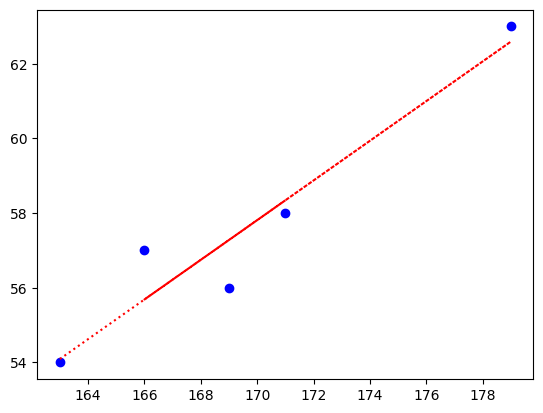

In [ ]:
plt.scatter(x, y, color = 'blue', marker = 'o')
plt.plot(x, lm.predict(x), 'r:')
plt.show()

In [ ]:
unseen = [[167]]
result = lm.predict(unseen)

In [ ]:
print('키 %d cm는 몸무게 %.2f kg으로 추정됨' %(unseen[0][0], result))

키 167 cm는 몸무게 56.22 kg으로 추정됨


## 예시

남/녀 구분이 있는 데이터 ; 0: 남자 1: 여자

In [ ]:
reg = linear_model.LinearRegression()
x = [[168, 0], [166, 0], [173, 0], [165, 0], [177, 0], [163, 0], [178, 0], [172, 0],
      [163, 1], [162, 1], [171, 1], [162, 1], [164, 1], [162, 1], [158, 1], [173, 1]]
y = [65, 61, 68, 63, 68, 61, 76, 67, 55, 51, 59, 53, 61, 56, 44, 57]

In [ ]:
reg.fit(x, y)

LinearRegression()

In [ ]:
print('계수: %.2f, %.2f' %(reg.coef_[0], reg.coef_[1]))
print('절편: %.2f' %reg.intercept_)
print('점수: %.3f' %reg.score(x, y))
print('동윤이와 은지의 추정 몸무게: ', reg.predict([[167, 0], [167, 1]]))

계수: 0.75, -7.23
절편: -61.23
점수: 0.843
동윤이와 은지의 추정 몸무게:  [63.69388959 56.46358918]


## 오차 구하기

In [ ]:
result = reg.predict(x)
error = (y - result) ** 2

mse = error.sum() / len(x)
print(mse)

8.907618846335327


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(mean_squared_error(result, y))

8.907618846335327


# 경사하강법

In [ ]:
x = np.array([1, 4.5 , 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

In [ ]:
x

array([ 1. ,  4.5,  9. , 10. , 13. ])

np.newaxis를 쓰면 2차원으로 변형 가능

In [ ]:
x[:, np.newaxis]

array([[ 1. ],
       [ 4.5],
       [ 9. ],
       [10. ],
       [13. ]])

In [ ]:
x[np.newaxis, :]

array([[ 1. ,  4.5,  9. , 10. , 13. ]])

In [ ]:
w, b = 0, 0
learning_rate, epoch = 0.005, 1000

for i in range(epoch):
  y_pred = w * x + b
  error = y_pred - y
  w = w - learning_rate * (error * x).sum()
  b = b - learning_rate * error.sum()

print('w: %.2f, b: %.2f' %(w, b))

w: 0.63, b: -1.65


오차제곱의 식을 계수와 절편으로 미분했을 때, 즉 두 변수에서의 오차의 순간변화율을 구해준다. 그 결과는 2*E[i] * x[i], 2 * E[i]이다.

위의 과정은 sklean의 LinearRegression 클래스에 구현되어 있다.

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
x_new = x[:, np.newaxis]
print(x_new)

[[ 1. ]
 [ 4.5]
 [ 9. ]
 [10. ]
 [13. ]]


In [ ]:
reg.fit(x_new, y)
print('w: %.2f, b: %.2f' %(reg.coef_, reg.intercept_))

w: 0.63, b: -1.65


## 시각화

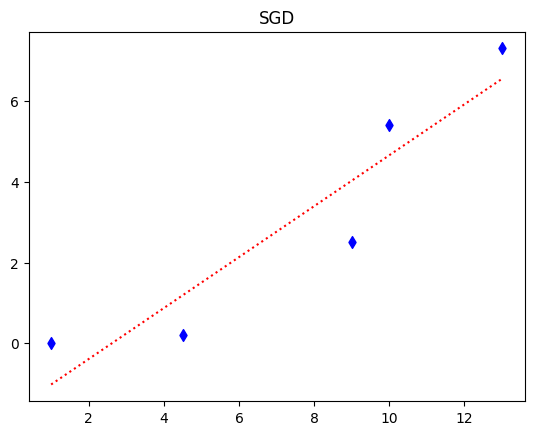

In [ ]:
plt.scatter(x, y, color = 'blue', marker = 'd')
plt.plot(x, w * x + b, 'r:')
plt.title('SGD')
plt.show()

# 선형회귀 예제

In [137]:
from sklearn import datasets

In [138]:
x, y = datasets.load_diabetes(return_X_y = True)

In [139]:
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [148]:
bmi = x[:, np.newaxis, 2]

In [168]:
bmi[0:5]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_tr, x_te, y_tr, y_te = train_test_split(bmi, y, test_size = 0.1, random_state = 0)

In [152]:
reg = linear_model.LinearRegression()
reg.fit(x_tr, y_tr)

LinearRegression()

In [153]:
y_pred = reg.predict(x_te)

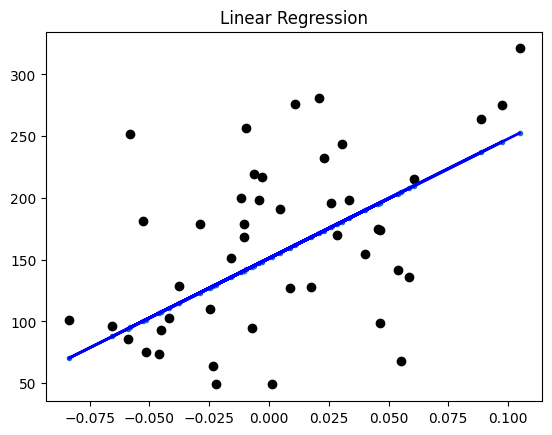

In [158]:
plt.plot(x_te, y_pred, '.')
plt.scatter(x_te, y_te, color = 'black')
plt.plot(x_te, y_pred, color = 'blue', linewidth = 2)
plt.title('Linear Regression')
plt.show()

## 성능 측정 지표

### MAE

In [159]:
from sklearn.metrics import mean_absolute_error

In [175]:
mean_absolute_error(y_te, y_pred)

50.46433577301329

### MSE(RMSE)

In [164]:
from sklearn.metrics import mean_squared_error

In [174]:
mean_squared_error(y_te, y_pred)

3914.8746802340793

In [176]:
np.sqrt(mean_squared_error(y_te, y_pred))

62.5689593986833

### 결정계수

In [171]:
from sklearn.metrics import r2_score

In [173]:
r2_score(y_te, y_pred)

0.1913673289984542